# Graph and tree search algorithms



## Best-First Search

In Best-First Search for each node we can consider any of the adjacent as next node. The idea is that an evaluation function (the heuristics values) that can be used to decide which adjacent node is the most promising to explore. The better the heuristics used the better the search will be.


## General Algorithm 
- Step 1: Place the starting node or root node into the queue.
- Step 2: If the queue is empty, then stop and return failure.
- Step 3: If the first element of the queue is our goal node, then stop and return success.
- Step 4: Else, remove the first element from the queue. Expand it and compute the estimated goal distance for each child. Place the children in the queue in ascending order to the goal distance.
- Step 5: Go to step-3
- Step 6: Exit


In [24]:
# Implementaiton by Jecsan Blanco
# best-fit greedy based on known heuristics 
from collections import deque
import operator


def get_children(graph, parent):
    return graph[parent[0]]


def add_heuristics(children, heuristics):
    children_with_heuristics = {}
    for child in children:
        children_with_heuristics.update({child: heuristics[child]})
    return children_with_heuristics

def get_path_cost(path,heuristics):
    sum = 0
    for node in path:
        sum += heuristics[node]
    return sum
def best_fit_search(graph, root, heuristics, goal):
    if graph is None:
        print("Error, null graph")
        return
    # Step 1
    queue = deque(root)
    # Step 2
    if len(queue) == 0:
        print("Error, null root")
        return
    path = []
    while 1:
        # step 3  and 4
        parent = queue.pop()
        path.append(parent[0])
        if parent[0] == goal:
            # step 6
            print("Goal " + goal + " found!")
            print("Path: " + str(path))
            print("Cost: " + str(get_path_cost(path,heuristics)))
            return
        # Children being the nodes below the parent node...
        children = get_children(graph, parent)
        # Tuple pairs with the heuristic for each  node...
        children = add_heuristics(children, heuristics)
        # Sorting , first in queue is always the smallest heuristic value.
        children = sorted(children.items(), key=operator.itemgetter(1), reverse=True)
        for child in children:
            queue.append(child)

## Example 1
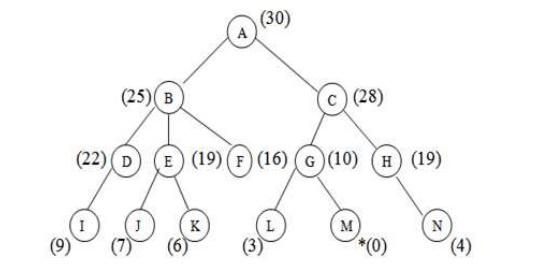


In [25]:
# graph data structure
graph = {'A': ['B', 'C'],
             'B': ['D', 'E', 'F'],
             'C': ['G', 'H'],
             'D': ['I'],
             'E': ['J'],
             'F': [],
             'G': ['L', 'M'],
             'H': ['N'],
             'I': [],
             'J': [],
             'K': [],
             'L': [],
             'M': [],
             'N': []}

graph_heuristics = {'A': 30,
                        'B': 25,
                        'C': 28,
                        'D': 22,
                        'E': 19,
                        'F': 16,
                        'G': 10,
                        'H': 19,
                        'I': 9,
                        'J': 7,
                        'K': 6,
                        'L': 3,
                        'M': 0,
                        'N': 4}

best_fit_search(graph=graph, root='A', heuristics=graph_heuristics, goal='M')


Goal M found!
Path: ['A', 'B', 'F', 'E', 'J', 'D', 'I', 'C', 'G', 'M']
Cost: 166


## Example 2
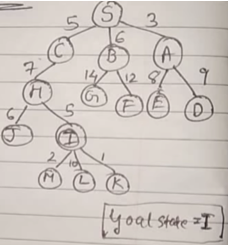


In [26]:
graph = {'S': ['C', 'B', 'A'],
             'C': ['H'],
             'B': ['G', 'F'],
             'A': ['E', 'D'],
             'H': ['J', 'I'],
             'G': [],
             'F': ['L', 'M'],
             'E': [],
             'D': [],
             'J': [],
             'I': ['M', 'L', 'K'],
             'L': [],
             'M': []}

graph_heuristics = {'S': 0, 'C': 5, 'B': 6, 'A': 3, 'H': 7, 'G': 14, 'F': 12, 'E': 8, 'D': 9, 'J': 6, 'I': 5,
                        'M': 2, 'L': 10, 'K': 1}
best_fit_search(graph=graph, root='S', heuristics=graph_heuristics, goal='I')

Goal I found!
Path: ['S', 'A', 'E', 'D', 'C', 'H', 'I']
Cost: 37


## Analysis

* The worst case is O(n*Log n) where we visit all the nodes before we reach the goal.
* The performance of the algorithm depends on how well the cost or evaluation function is designed.



# Resources
Example / general algorithm: 

https://www.brainkart.com/article/Best-First-Search--Concept--Algorithm--Implementation--Advantages--Disadvantages_8881/

Example 2:

https://www.youtube.com/watch?v=iGEu2wab8y0

